# Prediction using Supervised Machine Learning


TASK-2 by Narasimha Reddy Kesari


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
url="http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data Imported",end="\n\n")

df

Data Imported



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
df.shape

(25, 2)

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
df.isnull().sum()  
#no null values here

Hours     0
Scores    0
dtype: int64

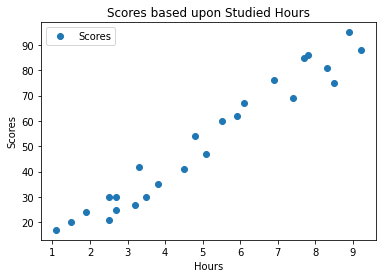

In [17]:
df.plot(x="Hours",y="Scores",style="o")
plt.xlabel("Hours")
plt.ylabel('Scores')
plt.title("Scores based upon Studied Hours")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

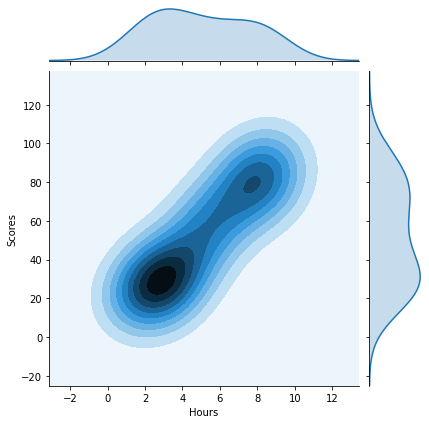

In [24]:
sns.jointplot(x='Hours',y='Scores',data=df,kind='kde')

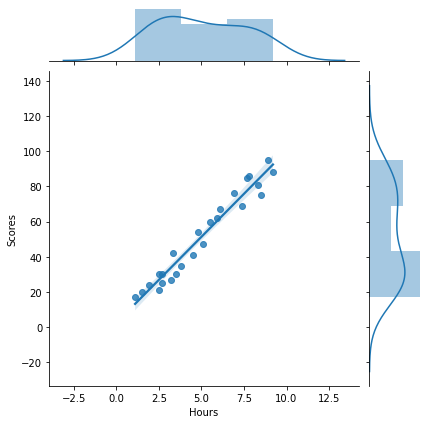

In [25]:
sns.jointplot(x='Hours',y='Scores',data=df,kind='reg')

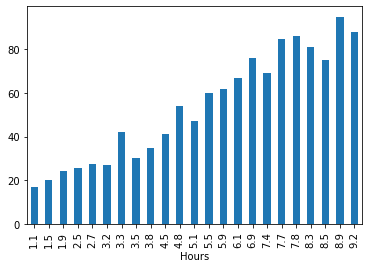

In [27]:
df.groupby('Hours')['Scores'].median().plot.bar()

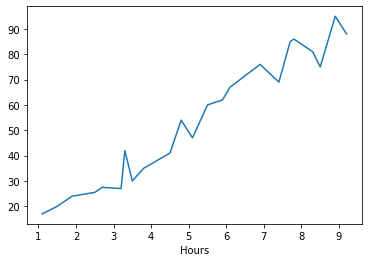

In [29]:
df.groupby('Hours')['Scores'].median().plot(kind='line')

Interesting plots.Its clearly showing that the increase in hours is not exactly directly proportional beacuse if you see the person who is spending 3-3.5 hrs is getting more marks than person spending 3.5-4 hrs

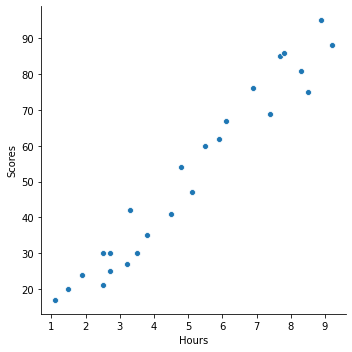

In [30]:
sns.relplot(x='Hours',y='Scores',data=df)

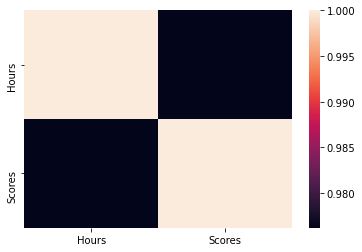

In [31]:
sns.heatmap(df.corr())

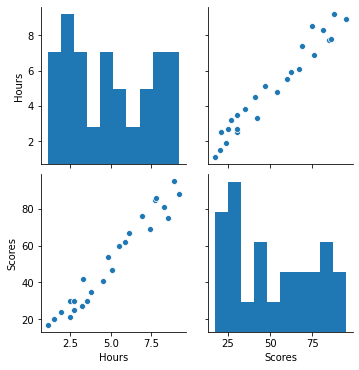

In [36]:
sns.pairplot(df)

Taking the dependent and independent variables from given data set x-Independent Variable y-Dependent Variable


In [33]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Using Simple Linear Regression 

Training the Algorithm

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

predicting the y values through x_test

In [46]:
y_pred = regressor.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [45]:
print("Training Score: ",regressor.score(x_train,y_train))
print("Test Score: ",regressor.score(x_test,y_test))

Training Score:  0.9515510725211552
Test Score:  0.9454906892105356


Through visualizing the results of training data

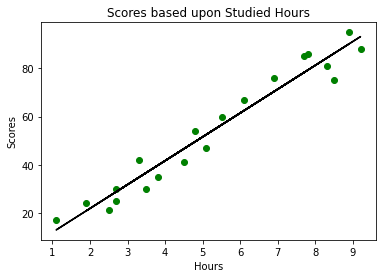

In [49]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,regressor.predict(x_train),color='black')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Scores based upon Studied Hours")
plt.show()

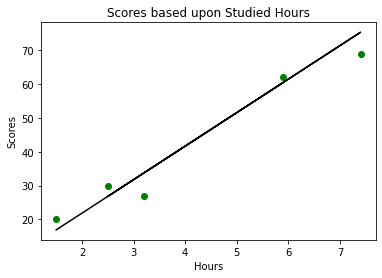

In [50]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,regressor.predict(x_test),color='black')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Scores based upon Studied Hours")
plt.show()

In [53]:
df1 = pd.DataFrame({'Actual' : y_test , 'Predicted':y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [63]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No. of Hours = {},  Predicted Score = {}".format(hours,own_pred[0]))

No. of Hours = 9.25,  Predicted Score = 93.69173248737538


# Evaluating the model


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [78]:
from sklearn import metrics
print("Mean Absolute error: " ,metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute error:  4.183859899002975
